In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## (1) 데이터 로드 및 시각화 

path = "/clustering-example.txt"

f = open(path,"r")
lst_x = []
lst_y = []

while True:
    line = f.readline()
    if not line: break
    x = line.split("\t")[0]
    y = line.split("\t")[1].split("\n")[0]
    lst_x.append(float(x))
    lst_y.append(float(y))
plt.scatter(lst_x,
            lst_y,
            alpha=0.2,
            cmap='viridis',
            label=("data"))
plt.legend(loc = "best")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()
f.close()
print("전체 샘플 수 : ", len(lst_x))



In [ ]:
## (1) mean shift 
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os

X = np.zeros([len(lst_x),2])
print("입력 데이터 shape : ", X.shape)

for i in range(len(lst_x)):
  X[i][0] = lst_x[i]
  X[i][1] = lst_y[i]
  
#print(X)
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print(bandwidth)
#bandwidth=0.5
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, max_iter=20)
ms.fit(X)
labels = ms.labels_
#print(labels.shape)
cluster_centers = ms.cluster_centers_
#print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#print(labels)
print("예측된 segment 개수 : %d" % n_clusters_)

plt.scatter(lst_x,
            lst_y,
            alpha=0.8,
            cmap='viridis',
            c = labels,
            label=("data"))
plt.legend(loc = "best")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()




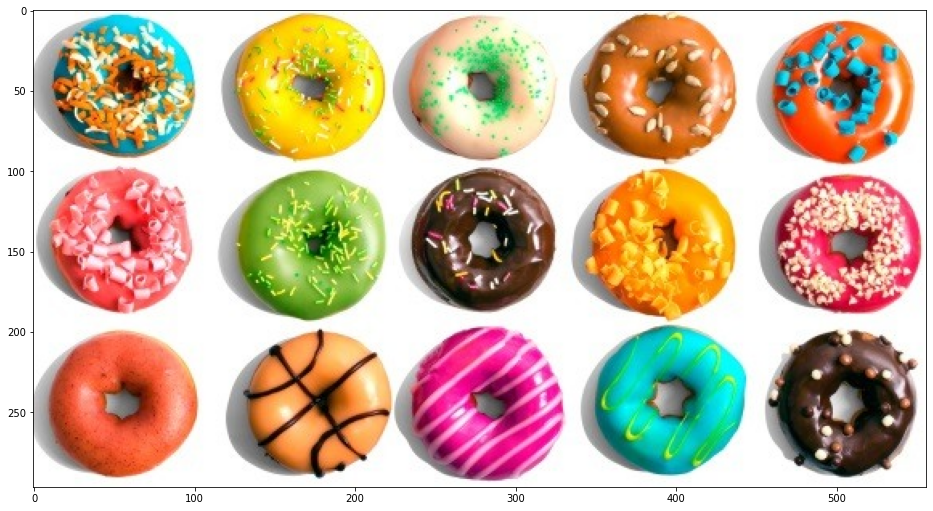

In [64]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os

pylab.rcParams['figure.figsize'] = 16, 12
img_path = "/도넛.png"
image = Image.open(img_path)

image = np.array(image)
original_shape = image.shape

# Flatten image.
X = np.reshape(image, [-1, 3])
plt.imshow(image)



In [65]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print(bandwidth)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
print(labels.shape)
cluster_centers = ms.cluster_centers_
print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

55.234135577646214
(165132,)
(10, 3)
number of estimated clusters : 10


(-0.5, 555.5, 296.5, -0.5)

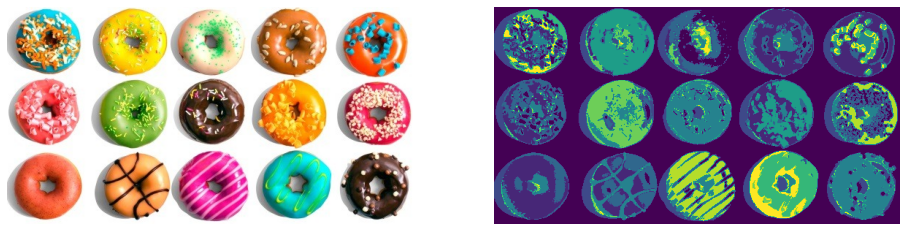

In [70]:
segmented_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis('off')